In [1]:
import geopandas

gdf = geopandas.read_file('../raw_data/bezirksgrenzen.geojson')

gdf = gdf.dissolve().drop(columns=['Gemeinde_name', "Gemeinde_schluessel","gml_id", "Land_name","Land_schluessel","Schluessel_gesamt"])
gdf['Location'] = 'Berlin'
gdf = gdf.set_index("Location")
gdf['centroid'] = gdf.centroid
gdf

/tmp/ipykernel_18406/1651785630.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


,geometry,centroid
Location,,
Berlin,"MULTIPOLYGON (((13.34255 52.41145, 13.34241 52...",POINT (13.40232 52.50149)


In [35]:
gdf['geometry'].contains(point)

Location
Berlin    True
dtype: bool

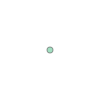

In [34]:
from shapely.geometry import Point, Polygon
point = Point(13.40232, 52.50149)
point

In [26]:
gdf.boundary.contains(point)

Location
Berlin    False
dtype: bool

In [8]:
gdf.contains(point)

Location
Berlin    False
dtype: bool

In [7]:
gdf['distance'] = gdf['centroid'].distance(point)
gdf['distance']

/tmp/ipykernel_18406/3558908884.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance'] = gdf['centroid'].distance(point)


Location
Berlin    55.175116
Name: distance, dtype: float64

In [ ]:
gdf['distance'].mean()

In [ ]:
gdf.plot("area", legend=True);

In [ ]:
gdf.explore("area", legend=False)

In [ ]:
gdf['area'] = gdf.area
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

In [ ]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

In [ ]:
gdf = gdf.set_geometry("geometry")

In [ ]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

In [ ]:
import fiona
mv_collection = fiona.open('../raw_data/bezirksgrenzen.geojson')

In [ ]:
mv_collection.driver

In [ ]:
mv_collection.crs

In [ ]:
mv_collection.schema

In [ ]:
len(list(mv_collection))  # only a single feature in this file:

In [ ]:
feature = list(mv_collection)[0]
feature

In [ ]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch

def fig_ax_for_map():
    """
    Return a matplotlib Figure and Axes object setup
    for displaying a map.
    """
    fig, ax = plt.subplots(dpi=180)
    ax.set_aspect('equal')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    return fig, ax

In [ ]:
def flatten_list(l):
    return sum(l, [])


def recursively_flatten_list(l):
    if l and isinstance(l[0], list):
        return flatten_list([recursively_flatten_list(m) for m in l])
    else:
        return l

def limits_of_values(v, buffer=0.0):
    return min(v) - buffer, max(v) + buffer

In [ ]:
fig, ax = fig_ax_for_map()

all_geom_coords = recursively_flatten_list(feature['geometry']['coordinates'])
lngs, lats = zip(*all_geom_coords)
lng_range = limits_of_values(lngs, buffer=0.1)
lat_range = limits_of_values(lats, buffer=0.1)

ax.set_xlim(lng_range)
ax.set_ylim(lat_range)

poly_patch = PolygonPatch(feature['geometry'], fc='blue', ec='black', alpha=0.5)
ax.add_patch(poly_patch)

plt.show()

In [ ]:
from pyproj import Proj
from shapely.ops import transform
from shapely.geometry import shape

In [ ]:
def plot_shape(ax, s, buffer=3000):
    """Plot a shape `s` on matplotlib Axes `ax`"""
    minx, miny, maxx, maxy = s.bounds

    ax.set_xlim((minx-buffer, maxx+buffer))
    ax.set_ylim((miny-buffer, maxy+buffer))

    poly_patch = PolygonPatch(s, fc='blue', ec='black', alpha=0.5)
    ax.add_patch(poly_patch)

In [ ]:
feat_shape = shape(feature['geometry'])

In [ ]:
fig, ax = fig_ax_for_map()
plot_shape(ax, feat_shape)
plt.show();

In [ ]:
feat_shape.bounds